In [27]:
from yahoo_historical import Fetcher
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

sb.set()
%matplotlib inline

In [241]:
chase = Fetcher('JPM', [2017,1,1], [2019,9,13]).getHistorical() #JPMorgan Chase & Co.
cap1 = Fetcher('COF', [2017,1,1], [2019,9,13]).getHistorical() #Capital One Financial Corporation
citi = Fetcher('C', [2017,1,1], [2019,9,13]).getHistorical() #Citigroup Inc.

In [184]:
print(cap1.columns)
print(chase.columns)
print(citi.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [185]:
cap1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,88.550003,89.599998,87.790001,88.870003,84.115540,3441100
1,2017-01-04,89.129997,90.769997,89.129997,90.300003,85.469025,2630900
2,2017-01-05,89.839996,89.930000,87.599998,88.379997,83.651749,2223900
3,2017-01-06,88.769997,89.180000,88.089996,88.599998,83.859993,1795800
4,2017-01-09,88.220001,88.400002,87.400002,87.440002,82.762047,2122800


In [242]:
for i in [chase, cap1, citi]:
    i['Date'] = pd.to_datetime(i['Date'])
    i.set_index('Date', inplace=True)

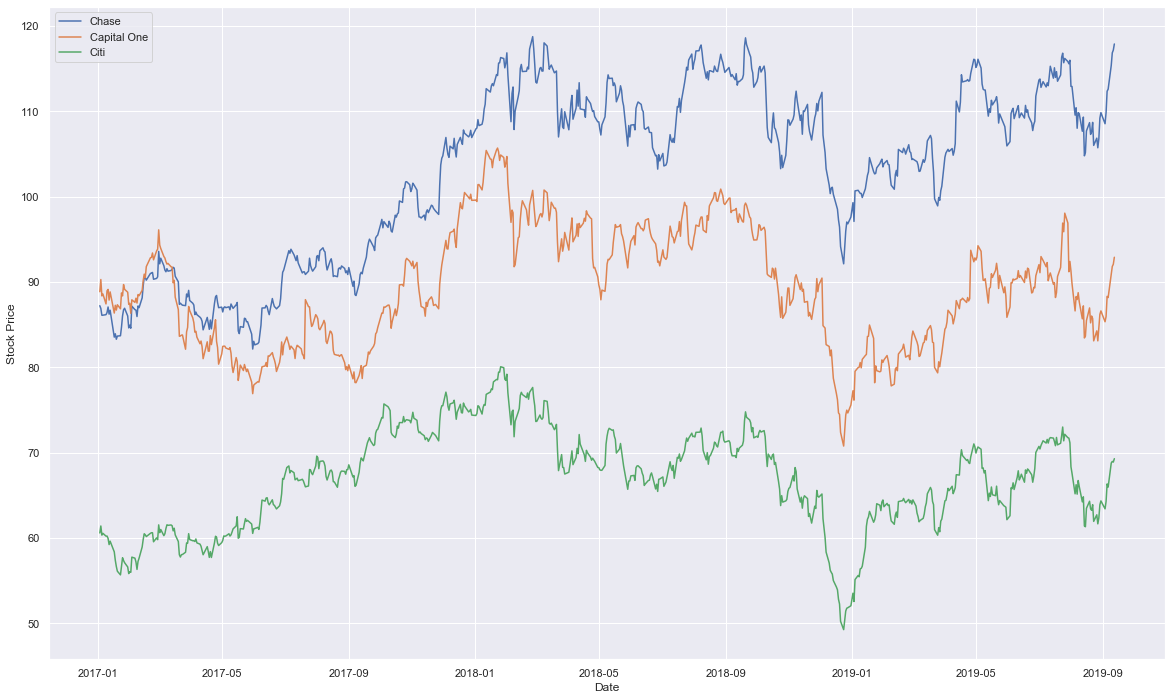

In [96]:
plt.figure(figsize=(20,12))
plt.plot(chase['Close'], label = 'Chase')
plt.plot(cap1['Close'], label = 'Capital One')
plt.plot(citi['Close'], label = 'Citi')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [243]:
features = ['Close', 'Volume']

cap1 = cap1[features]
chase = chase[features]
citi = citi[features]

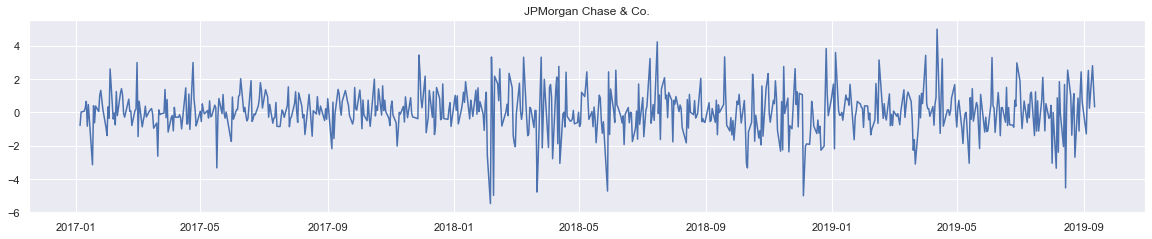

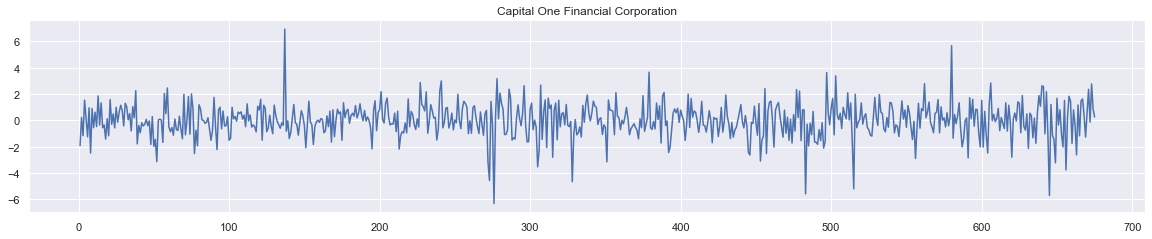

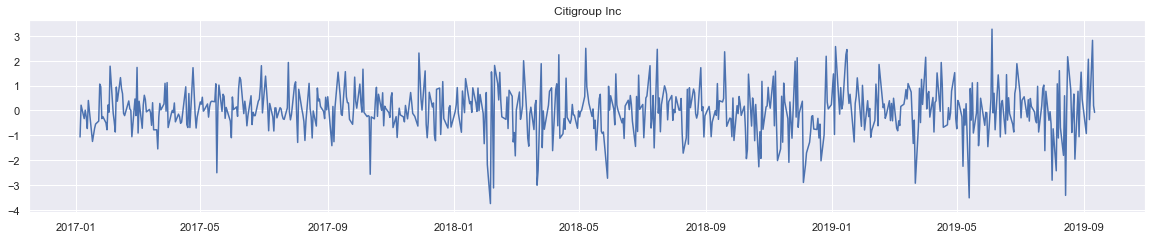

In [175]:
plt.figure(figsize=(20,12))
plt.subplot(311)
plt.plot(chase['Close'].diff(), label = 'Chase')
plt.title('JPMorgan Chase & Co.')

plt.figure(figsize=(20,12))
plt.subplot(312)
plt.plot(cap1['Close'].diff(), label = 'Capital One')
plt.title('Capital One Financial Corporation')

plt.figure(figsize=(20,12))
plt.subplot(313)
plt.plot(citi['Close'].diff(), label = 'Citi')
plt.title('Citigroup Inc')
plt.show()

In [244]:
#shift data
for i in [chase, cap1, citi]:
    i['1d_future_close'] = i['Close'].shift(-5)
    i['1d_close_future_pct'] = i['1d_future_close'].pct_change(5)
    i['1d_close_pct'] = i['Close'].pct_change(5)
    i['1d_future_vol'] = i['Volume'].shift(-5)
    i['1d_vol_future_pct'] = i['1d_future_vol'].pct_change(5)
    i['1d_vol_pct'] = i['Volume'].pct_change(5)

In [246]:
cap1 = cap1.dropna()
chase = chase.dropna()
citi = citi.dropna()

In [247]:
cap1.head()

,Close,Volume,1d_future_close,1d_close_future_pct,1d_close_pct,1d_future_vol,1d_vol_future_pct,1d_vol_pct
Date,,,,,,,,
2017-01-10,88.980003,3141200,87.279999,-0.019105,0.001238,1706400.0,-0.456768,-0.087152
2017-01-11,89.139999,1885100,86.720001,-0.027148,-0.012846,1696700.0,-0.099942,-0.283477
2017-01-12,87.889999,2064300,87.339996,-0.006258,-0.005544,1684500.0,-0.183985,-0.071766
2017-01-13,88.849998,2327800,86.870003,-0.022285,0.002822,2821000.0,0.211874,0.296247
2017-01-17,86.370003,2192300,88.730003,0.027324,-0.012237,2711800.0,0.236966,0.032740


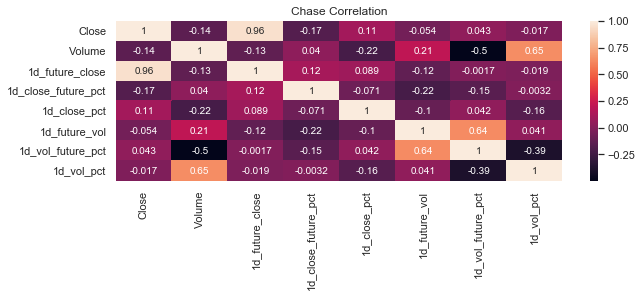

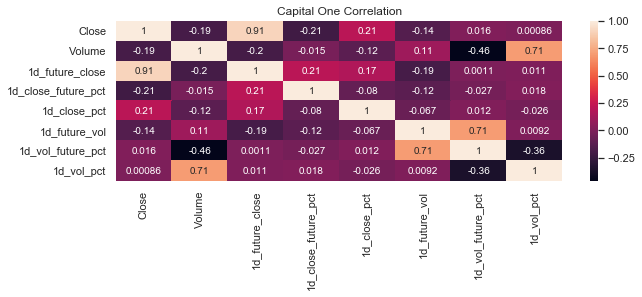

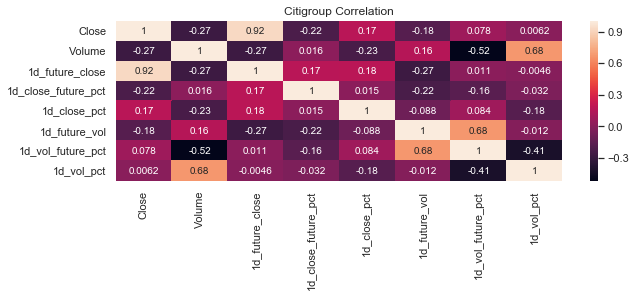

In [191]:
plt.figure(figsize=(10,10))
plt.subplot(311)
sb.heatmap(chase.corr(), annot=True)
plt.title('Chase Correlation')

plt.figure(figsize=(10,10))
plt.subplot(312)
sb.heatmap(cap1.corr(), annot=True)
plt.title('Capital One Correlation')

plt.figure(figsize=(10,10))
plt.subplot(313)
sb.heatmap(citi.corr(), annot=True)
plt.title('Citigroup Correlation')

plt.show()

In [257]:
chase = chase[['Close', '1d_future_close']]
cap1 = cap1[['Close', '1d_future_close']]
citi = citi[['Close', '1d_future_close']]

In [279]:
from functools import reduce
data_frames = [chase, cap1, citi]
merged_df = reduce(lambda  left,right: pd.merge(left,right,on=['Date'], how='outer'), data_frames)

In [133]:
class LinearRegression():
    def fit(self, X, y, eta= 0.001, epochs= 1000):
        self.X = X
        self.Y = y
        self.costs = []
        D = X.ndim
        if D == 1:
            denom = self.X.dot(self.X) - self.X.mean() * self.X.sum()
            self.a = (self.X.dot(self.Y) - self.Y.mean()*X.sum()) / denom
            self.b = (self.Y.mean() * self.X.dot(X) - self.X.mean() * self.X.dot(self.Y)) / denom
    
        else:
            self.w = np.random.randn(self.X.shape[1]) / np.sqrt(self.X.shape[1])

            for t in range(epochs):
                y_hat = self.X.dot(self.w)
                delta = y_hat - self.Y
                self.w = self.w - eta*self.X.T.dot(delta)
                mse = delta.dot(delta) / self.X.shape[0]
                self.costs.append(mse)
    
    def predict(self, X):
        D = X.ndim
        if D == 1:
            y_hat = self.a*X + self.b
        else:
            y_hat = X.dot(self.w)
        
        return y_hat

In [280]:
merged_df.head()

,Close_x,1d_future_close_x,Close_y,1d_future_close_y,Close,1d_future_close
Date,,,,,,
2017-01-10,86.430000,83.940002,88.980003,87.279999,60.230000,57.389999
2017-01-11,87.080002,83.300003,89.139999,86.720001,59.959999,56.660000
2017-01-12,86.239998,83.669998,87.889999,87.339996,59.230000,56.110001
2017-01-13,86.699997,83.709999,88.849998,86.870003,59.630001,55.680000
2017-01-17,83.550003,84.720001,86.370003,88.730003,58.380001,56.740002


In [281]:
merged_df.columns = ["chase_close", "chase_future", "cap1_close", "cap1_future", "citi_close", "citi_future"]

In [282]:
merged_df.head()

,chase_close,chase_future,cap1_close,cap1_future,citi_close,citi_future
Date,,,,,,
2017-01-10,86.430000,83.940002,88.980003,87.279999,60.230000,57.389999
2017-01-11,87.080002,83.300003,89.139999,86.720001,59.959999,56.660000
2017-01-12,86.239998,83.669998,87.889999,87.339996,59.230000,56.110001
2017-01-13,86.699997,83.709999,88.849998,86.870003,59.630001,55.680000
2017-01-17,83.550003,84.720001,86.370003,88.730003,58.380001,56.740002


In [283]:
merged_df.reset_index(inplace=True)

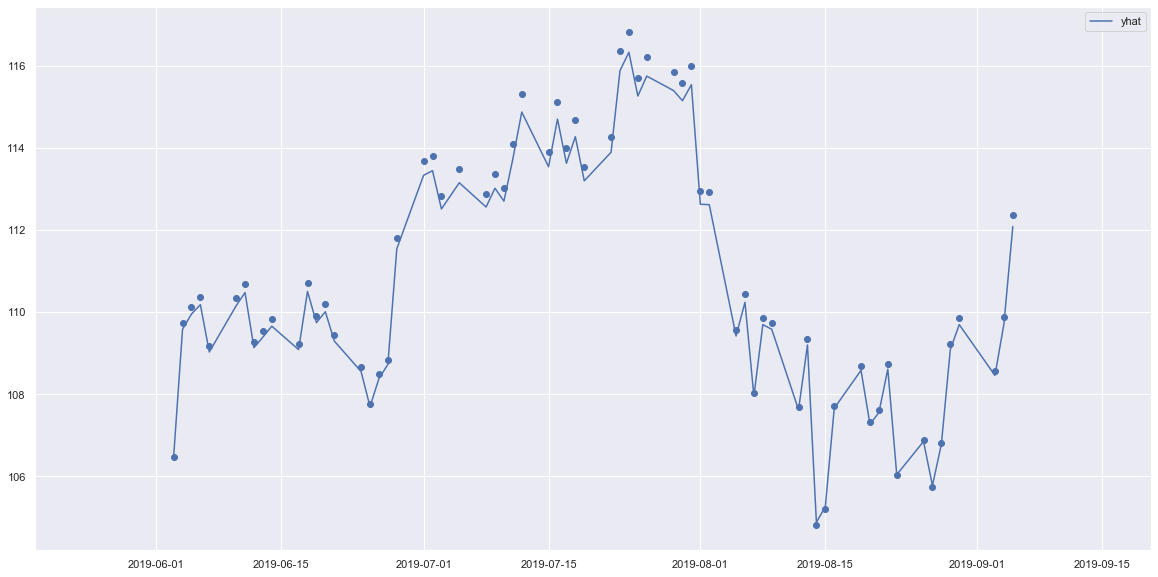

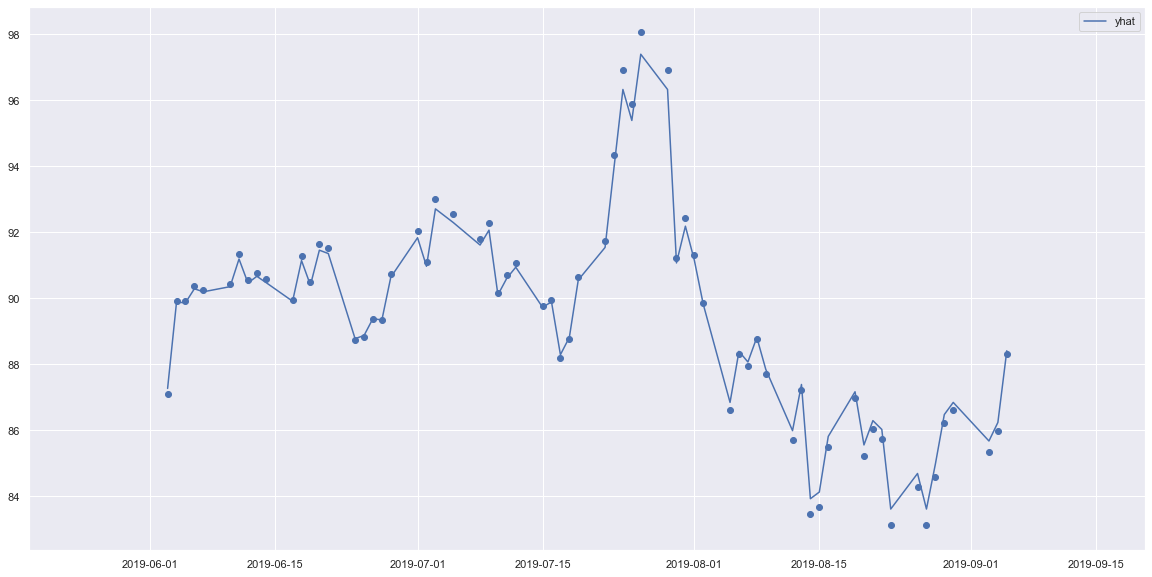

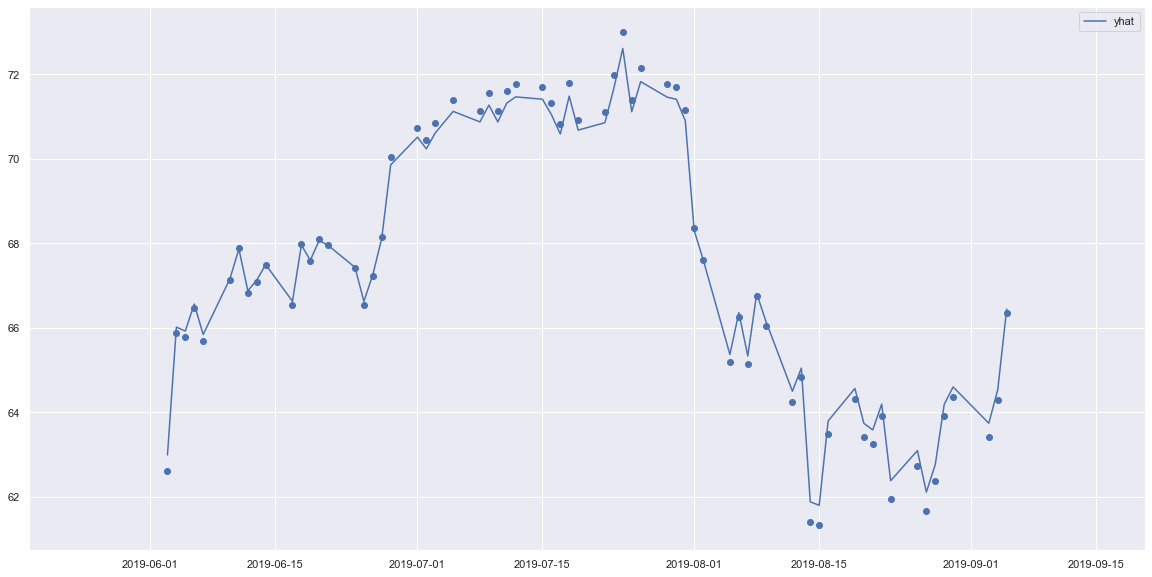

In [285]:
for i in range(1,7, 2):
    X = merged_df.iloc[:,i].to_numpy()
    y = merged_df.iloc[:,i+1].to_numpy()
    train_size = round(len(X)*0.9)
    X_train = X[:train_size]
    y_train = y[:train_size]
    X_test = X[train_size:]
    y_test = y[train_size:]
    
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    y_hat = lin_reg.predict(X_test)
    
    date_test = date[train_size:]
    
    plt.figure(figsize=(20,10))
    plt.scatter(date_test, X_test)
    plt.plot(date_test, y_hat, label= 'yhat')
    plt.legend()
    plt.show()